In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold



In [2]:
file_path = "Salary Data 14.xlsx"
df = pd.read_excel(file_path)


In [3]:
# Remove missing values
df = df.dropna()

# Select relevant features
X1 = df["Years of Experience"].values
X2 = df["Education Level"].values
X3 = df["Job Title"].astype("category").cat.codes.values  # Job Title encoded as numeric (proxy for skills)
y = df["Salary"].values


In [4]:
# Map Education Level to numeric
edu_mapping = {"Bachelor's": 1, "Master's": 2, "PhD": 3}
if df["Education Level"].dtype == object:
    X2 = np.array([edu_mapping.get(val, 0) for val in df["Education Level"]])

# Normalize features for stable training
X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)
X3 = (X3 - np.mean(X3)) / np.std(X3)


In [5]:
# 2️⃣ Hyperparameters
# ------------------------------------------------------------
alpha = 0.01      # learning rate
epochs = 1000     # number of iterations
k = 5             # number of folds for cross validation

kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold = 1
mse_scores = []
r2_scores = []
cost_history_all = []


In [6]:
# ------------------------------------------------------------
# 3️⃣ Gradient Descent + K-Fold Cross Validation
# ------------------------------------------------------------
for train_index, test_index in kf.split(X1):
    print(f"\n🔹 Fold {fold}/{k}")

    # Split data for this fold
    X1_train, X1_test = X1[train_index], X1[test_index]
    X2_train, X2_test = X2[train_index], X2[test_index]
    X3_train, X3_test = X3[train_index], X3[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize model parameters
    m1 = m2 = m3 = c = 0
    n = len(y_train)
    cost_history = []



🔹 Fold 1/5

🔹 Fold 1/5

🔹 Fold 1/5

🔹 Fold 1/5

🔹 Fold 1/5


In [7]:
    # -----------------------------
    # Gradient Descent Training
    # -----------------------------
    for i in range(epochs):
        # Predicted salary
        y_pred = m1 * X1_train + m2 * X2_train + m3 * X3_train + c

        # Error
        error = y_pred - y_train

        # Cost function (Mean Squared Error)
        cost = (1 / (2 * n)) * np.sum(error ** 2)
        cost_history.append(cost)



In [8]:
        # Gradients
        dm1 = (1 / n) * np.sum(error * X1_train)
        dm2 = (1 / n) * np.sum(error * X2_train)
        dm3 = (1 / n) * np.sum(error * X3_train)
        dc = (1 / n) * np.sum(error)

        # Parameter updates
        m1 -= alpha * dm1
        m2 -= alpha * dm2
        m3 -= alpha * dm3
        c -= alpha * dc


In [10]:
    cost_history_all.append(cost_history)

In [11]:
    y_pred_test = m1 * X1_test + m2 * X2_test + m3 * X3_test + c



In [13]:
mse = np.mean((y_pred_test - y_test) ** 2)

In [15]:
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred_test) ** 2)
r2 = 1 - (ss_residual / ss_total)


In [16]:
mse_scores.append(mse)
r2_scores.append(r2)


In [17]:
print(f"Fold {fold}: MSE = {mse:.2f}, R² = {r2*100:.2f}%")
fold += 1


Fold 1: MSE = 13205651168.20, R² = -437.38%


In [18]:
print("\n=======================================")
print("✅ Cross-Validation Performance Summary")
print("=======================================")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average R² Score: {np.mean(r2_scores)*100:.2f}%")


✅ Cross-Validation Performance Summary
Average MSE: 13205651168.20
Average R² Score: -437.38%


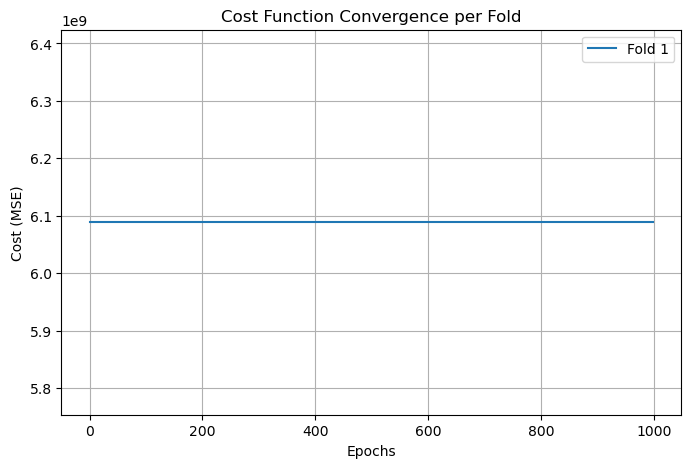

In [19]:
plt.figure(figsize=(8, 5))
for i, cost_history in enumerate(cost_history_all, 1):
    plt.plot(cost_history, label=f'Fold {i}')
plt.title("Cost Function Convergence per Fold")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.grid(True)
plt.show()
